In [1]:
import pandas as pd

In [2]:
import seaborn  as sb

In [3]:
data = pd.read_csv("SetFiltered.csv", sep= ";") 
type(data)

pandas.core.frame.DataFrame

#Erste Erkenntnisse first look

Null gibt es sonst nicht
NAN auch nicht
-1 auch nicht 

In [4]:
data[81:82]


,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
81,C (all),8500,IDOTRR,1Fam,4,4,1920,1950,Gambrel,649,TA,N,1317,6,1,2008,40000


In [5]:
data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,10629.817778,6.014444,5.652222,1969.347778,1984.185556,1028.166667,1487.441111,6.415556,1.745556,2007.896667,176184.454444
std,9947.088936,1.336912,1.151555,29.573049,20.195265,403.019702,504.588271,1.601786,0.715887,1.306010,71412.482393
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,2.000000,0.000000,2006.000000,39300.000000
25%,7432.250000,5.000000,5.000000,1953.000000,1966.000000,790.250000,1102.750000,5.000000,1.000000,2007.000000,130000.000000
50%,9475.000000,6.000000,5.000000,1971.000000,1993.000000,968.500000,1443.500000,6.000000,2.000000,2008.000000,161000.000000
75%,11700.000000,7.000000,6.000000,1998.000000,2002.000000,1249.500000,1750.500000,7.000000,2.000000,2009.000000,205000.000000
max,164660.000000,10.000000,9.000000,2009.000000,2009.000000,3206.000000,4316.000000,12.000000,4.000000,2010.000000,755000.000000


Lot Area riesiges Maximum kann riesige Auswirkungen haben. </br>
Riesiges Minimum und Maximum </br>




In [6]:
bigG = data.query("TotalBsmtSF == 3206")
bigG


,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
123,RL,10655,NridgHt,1Fam,8,5,2003,2004,Gable,3206,Ex,Y,1629,7,3,2009,284000


In [7]:
data[data["LotArea"].idxmax():data["LotArea"].idxmax()+1]

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
844,RL,164660,Timber,2fmCon,5,6,1965,1965,Gable,1499,Ex,Y,1786,7,2,2008,228950


In [8]:
data["MSZoning"].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

In [9]:
data['MSZoning'].value_counts()

RL         716
RM         145
FV          28
RH          10
C (all)      1
Name: MSZoning, dtype: int64

C (all) ist nur alleine 

In [10]:
data = data.query("MSZoning != 'C (all)'")

In [11]:
data['Neighborhood'].value_counts()

NAmes      150
CollgCr    103
OldTown     71
Edwards     53
Sawyer      52
Gilbert     47
NWAmes      46
BrkSide     41
NridgHt     39
SawyerW     37
Crawfor     34
Somerst     34
Mitchel     33
NoRidge     26
Timber      21
IDOTRR      20
SWISU       18
ClearCr     17
StoneBr     13
MeadowV     12
Blmngtn      9
BrDale       9
Veenker      8
NPkVill      5
Blueste      1
Name: Neighborhood, dtype: int64

Blueste kommt nur einmal vor

In [12]:
data = data.query("Neighborhood != 'Blueste'")


Geund warum dies man kann mit der Information Blueste wenn es nur einen Eintrag gibt nichts anfangen

In [13]:
data['BldgType'].value_counts()

1Fam      758
TwnhsE     67
Duplex     29
Twnhs      27
2fmCon     17
Name: BldgType, dtype: int64

Einfamiliehaushalt ist am häufigsten 

In [14]:
data['OverallQual'].value_counts()

5     248
6     243
7     193
8      92
4      77
9      23
3      13
10      6
1       2
2       1
Name: OverallQual, dtype: int64

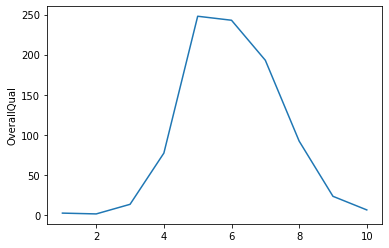

In [15]:
sb.lineplot(data['OverallQual'].value_counts().keys(), data['OverallQual'].value_counts())


schaut nach einer Gaussverteilung aus

In [16]:
data['OverallCond'].value_counts()

5    481
6    157
7    134
8     55
4     40
9     17
3     12
2      1
1      1
Name: OverallCond, dtype: int64

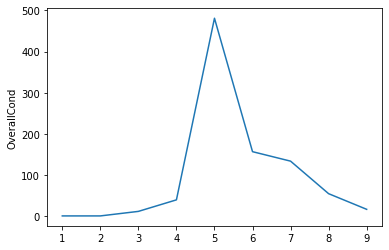

In [17]:
sb.lineplot(data['OverallCond'].value_counts().keys(), data['OverallCond'].value_counts())

In [18]:
data['RoofStyle'].value_counts()

Gable      707
Hip        171
Flat         7
Gambrel      6
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

Giebel und hip dach sind auf häufigsten 

In [19]:
data['HeatingQC'].value_counts()

Ex    448
TA    262
Gd    161
Fa     26
Po      1
Name: HeatingQC, dtype: int64

schlechte warmequaltität der Heizung ist nur ein Haus

In [20]:
data['CentralAir'].value_counts()

Y    844
N     54
Name: CentralAir, dtype: int64

Meiste haben eine Klimaanlage

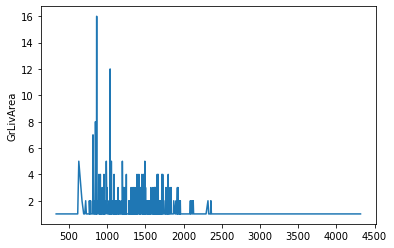

In [21]:
sb.lineplot(data['GrLivArea'].value_counts().keys(), data['GrLivArea'].value_counts())

Viele kleine und der eine ausreisser

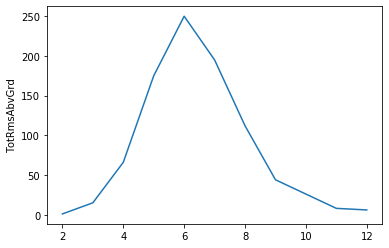

In [22]:
sb.lineplot(data['TotRmsAbvGrd'].value_counts().keys(), data['TotRmsAbvGrd'].value_counts())

Sieht gut aus

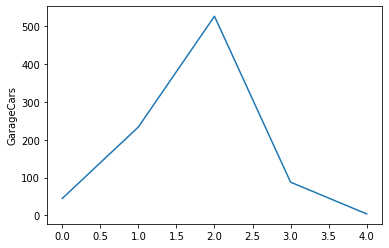

In [23]:
sb.lineplot(data['GarageCars'].value_counts().keys(), data['GarageCars'].value_counts())

geht 

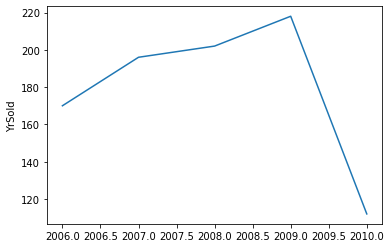

In [24]:
sb.lineplot(data['YrSold'].value_counts().keys(), data['YrSold'].value_counts())

Was war 2009.5 ?

In [25]:
data['YrSold'].value_counts()

2009    218
2008    202
2007    196
2006    170
2010    112
Name: YrSold, dtype: int64

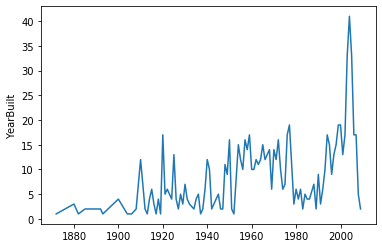

In [26]:
sb.lineplot(data['YearBuilt'].value_counts().keys(), data['YearBuilt'].value_counts())

In [27]:
YearBuilt = data['YearBuilt'].value_counts()

In [28]:
built = 0
for i in range(1940,1961):
    if i in YearBuilt.keys():
        built+=YearBuilt[i]
        print("{}: {}".format(i,YearBuilt[i]))
    else:
        print("Kein Haus im Jahr: {}".format(i))
built

1940: 12
1941: 10
1942: 2
Kein Haus im Jahr: 1943
Kein Haus im Jahr: 1944
1945: 5
1946: 2
1947: 2
1948: 11
1949: 9
1950: 16
1951: 2
1952: 1
1953: 8
1954: 15
1955: 12
1956: 10
1957: 16
1958: 14
1959: 17
1960: 10


174

In [29]:
data['YearRemodAdd'].value_counts()

1950    111
2005     53
2004     46
2006     38
2000     37
2002     36
2003     35
2007     32
1996     26
1995     25
1997     23
1998     23
1999     20
1994     16
2001     15
1976     15
2008     14
1972     14
1993     13
1970     13
1977     13
1966     12
1959     12
1990     12
1978     11
1965     11
1968     11
1967     11
1973     10
1971     10
1964      9
1962      9
1991      9
1963      8
1980      8
1975      8
1985      8
1988      8
1957      7
1960      7
1992      7
1954      7
1956      7
1987      7
1981      7
1955      7
1958      7
1969      6
1989      6
1982      6
1953      6
2009      4
1961      4
1979      4
1983      3
1984      3
1986      3
1974      2
1951      2
1952      1
Name: YearRemodAdd, dtype: int64

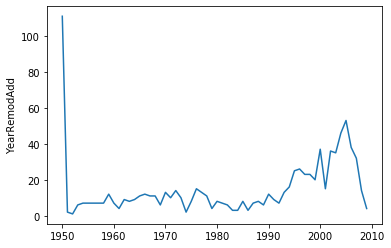

In [30]:
sb.lineplot(data['YearRemodAdd'].value_counts().keys(), data['YearRemodAdd'].value_counts())

1950 gab es eine große renoirierungswelle

In [31]:
data.corr()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
LotArea,1.000000,0.078118,0.008611,-0.002769,0.013309,0.214496,0.241608,0.170915,0.175377,-0.028536,0.294612
OverallQual,0.078118,1.000000,-0.070117,0.505580,0.497455,0.503372,0.579505,0.420298,0.570377,0.015041,0.778689
OverallCond,0.008611,-0.070117,1.000000,-0.413357,0.106004,-0.179958,-0.064906,-0.042361,-0.175688,-0.013004,-0.048636
YearBuilt,-0.002769,0.505580,-0.413357,1.000000,0.531105,0.375120,0.150368,0.058768,0.502403,0.042530,0.471721
YearRemodAdd,0.013309,0.497455,0.106004,0.531105,1.000000,0.249978,0.234302,0.143257,0.384041,0.066916,0.463600
TotalBsmtSF,0.214496,0.503372,-0.179958,0.375120,0.249978,1.000000,0.391654,0.255091,0.408928,0.049185,0.628727
GrLivArea,0.241608,0.579505,-0.064906,0.150368,0.234302,0.391654,1.000000,0.835124,0.476622,-0.013700,0.758611
TotRmsAbvGrd,0.170915,0.420298,-0.042361,0.058768,0.143257,0.255091,0.835124,1.000000,0.357591,-0.016895,0.550466
GarageCars,0.175377,0.570377,-0.175688,0.502403,0.384041,0.408928,0.476622,0.357591,1.000000,0.009687,0.633621
YrSold,-0.028536,0.015041,-0.013004,0.042530,0.066916,0.049185,-0.013700,-0.016895,0.009687,1.000000,0.010421


Starke corr zwischen preis mit Qulität, TotalMsmtSF, LivArea, größe Garage. außerdem livArea und room above ground, Idee: eines weglassen  

In [32]:
dataP = data.drop(columns = ["TotRmsAbvGrd"])
#data.drop(columns = ["YearBuilt"]) ???

In [33]:
dataP = dataP.drop(columns = ["YrSold"])

Hat corr kaum relation mit SalePrice und auch mit den anderen keine, dassheißt hier gibt es keinen Mehrwert 

Weil Daten doppelt mit livArea 

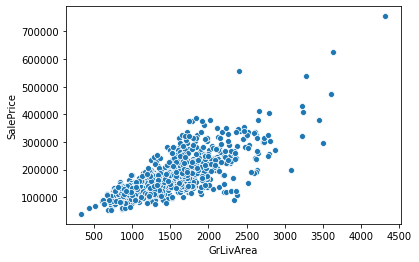

In [34]:
sb.scatterplot(dataP["GrLivArea"],dataP["SalePrice"])

Dadurch passen Ausreißer von Größe und Preis zusammen

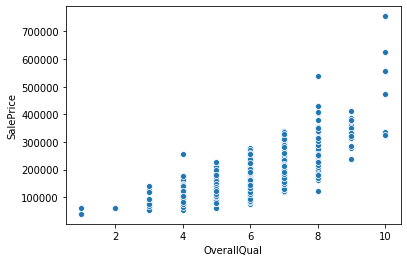

In [35]:
sb.scatterplot(dataP["OverallQual"],dataP["SalePrice"])

qualitat hat range

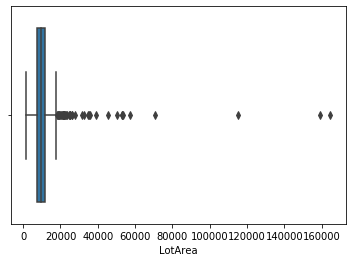

In [36]:
sb.boxplot(dataP["LotArea"])

viele Ausreißer nach oben

r

In [37]:
dataP = dataP.sample(frac=1, random_state = 42)
#Die Daten zufällig anordnen, random state damit Beispielrechnung richtig und Ergebnisse gleich bleiben

In [38]:
labels = dataP["SalePrice"]
labels

332    117000
639    360000
327    130500
850    185850
39     337500
        ...  
107     80000
271    179500
862    188700
436    213000
103     60000
Name: SalePrice, Length: 898, dtype: int64

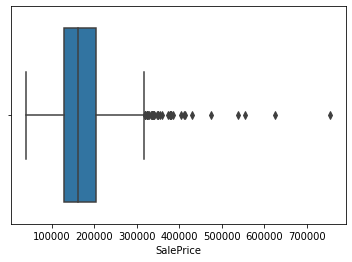

In [39]:
sb.boxplot(dataP["SalePrice"])

In [40]:
lenDataSet = len(dataP)

In [41]:
import nltk
import numpy as np


def text_to_numbers(text, cutoff_for_rare_words = 1):
    """Function to convert text to numbers. Text must be tokenzied so that
    test is presented as a list of words. The index number for a word
    is based on its frequency (words occuring more often have a lower index).
    If a word does not occur as many times as cutoff_for_rare_words,
    then it is given a word index of zero. All rare words will be zero.
    """
    
    # Flatten list if sublists are present
    if len(text) > 1:
        flat_text = [sublist for sublist in text]
        
    else:
        flat_text = text
    
    # get word freuqncy
    fdist = nltk.FreqDist(flat_text)

    # Convert to Pandas dataframe
    df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
    df_fdist.columns = ['Frequency']

    # Sort by word frequency
    df_fdist.sort_values(by=['Frequency'], ascending=False, inplace=True)

    # Add word index
    number_of_words = df_fdist.shape[0]
    df_fdist['word_index'] = list(np.arange(number_of_words)+1)

   
    
    # Convert pandas to dictionary
    word_dict = df_fdist['word_index'].to_dict()
   
    
    # Use dictionary to convert words in text to numbers
    text_numbers = []
    for string in text:
        string_numbers = word_dict[string]
        text_numbers.append(string_numbers)  
    
    return (text_numbers)

In [42]:
dataP.loc[:,"MSZoning"]

332    RL
639    RL
327    RL
850    RL
39     RL
       ..
107    RM
271    RL
862    RL
436    RL
103    RL
Name: MSZoning, Length: 898, dtype: object

In [43]:
stringLabels = ["MSZoning","Neighborhood","BldgType","RoofStyle","HeatingQC","CentralAir"]

In [44]:
for element in stringLabels:
    dataP.loc[:,element] = text_to_numbers(dataP.loc[:,element])
data

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
0,RL,9590,Timber,1Fam,7,5,2003,2003,Gable,868,Ex,Y,1146,6,2,2007,187500
1,RL,12256,NoRidge,1Fam,8,5,1994,1995,Gable,1463,Ex,Y,2622,9,2,2010,325000
2,RL,12108,Edwards,Duplex,4,4,1955,1955,Gable,1440,TA,N,1440,8,0,2008,118000
3,RL,7500,Sawyer,1Fam,5,5,1963,1963,Gable,1040,Fa,Y,1040,5,1,2010,133000
4,RM,6000,OldTown,2fmCon,4,4,1953,1953,Gable,936,TA,N,936,4,2,2009,93000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,RL,8750,CollgCr,1Fam,7,5,1996,1996,Gable,880,Ex,Y,1716,7,2,2009,191000
896,RL,8064,NAmes,1Fam,5,7,1949,2006,Gable,672,Ex,Y,924,6,2,2007,122900
897,RL,13005,NWAmes,1Fam,7,7,1980,1980,Gable,845,TA,Y,2353,10,2,2009,260000
898,RL,9375,CollgCr,1Fam,8,5,2002,2002,Gable,1284,Ex,Y,2169,7,2,2007,228500


In [45]:
rawdata = dataP.loc[:,"MSZoning":"GarageCars"]
rawdata

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,GarageCars
332,1,10998,4,1,5,5,1941,1960,1,984,1,1,1604,2
639,1,12378,9,1,9,5,2003,2004,1,1896,1,1,1944,3
327,1,6600,13,1,5,9,1982,2008,1,816,1,1,816,1
850,1,7052,9,2,7,5,2005,2005,1,1364,1,1,1364,2
39,1,12456,9,1,10,5,2006,2007,2,1700,1,1,1718,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,4608,3,1,4,6,1945,1950,1,747,2,1,747,1
271,1,8400,17,1,5,8,1939,1997,1,720,1,1,2192,1
862,1,11988,11,1,6,7,1934,1995,2,715,4,1,1660,1
436,1,8400,2,1,7,5,2004,2005,1,1473,1,1,1484,2


In [46]:
import math

In [47]:
trainData = rawdata[0:math.floor(lenDataSet*0.8)]

In [48]:
validateData = rawdata[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)] 

In [49]:
testData = rawdata[math.ceil(lenDataSet*0.95):]

In [50]:
trainLabels = labels[0:math.floor(lenDataSet*0.8)] 

In [51]:
validateLabels = labels[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)]

In [52]:
testLabels = labels[math.ceil(lenDataSet*0.95):]

In [53]:
from sklearn.ensemble import RandomForestRegressor

rfR = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = 3)
rfR.fit(trainData, trainLabels)
#n_estimators = Anzahl an trees 
#random_state = 
# max_featurs = anzahl der feautres maximal 


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [54]:
rfR.score(validateData, validateLabels)


0.9174617531675052

In [55]:
import sklearn
#import sklearn.cross_validation

In [56]:
 from sklearn.model_selection import cross_val_score

In [57]:
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = 3)
scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
scores

array([0.88123051, 0.83794313, 0.90861283, 0.89474147, 0.82423702])

In [58]:
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = "sqrt")
scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
scores

array([0.88123051, 0.83794313, 0.90861283, 0.89474147, 0.82423702])

In [59]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
#sum(scores)/len(scores)


In [60]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures + 1)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
#sum(scores)/len(scores)

In [61]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures - 1)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
#sum(scores)/len(scores)

In [62]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures - 2)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
#sum(scores)/len(scores)

In [63]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures + 2)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
#sum(scores)/len(scores)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
gbR = GradientBoostingRegressor(
    max_depth=1,
    n_estimators=1000,
    learning_rate=0.1
)
gbR.fit(trainData, trainLabels)
gbR.score(validateData, validateLabels)
#gbr.predict(rawdata[1:2])

0.9153202086411851

In [66]:
linearData = trainData.iloc[:, [4 ,9, 12]]


In [67]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(linearData, trainLabels)
#clf.coef_
#clf.intercept_
#clf.score


In [68]:
linearDataV = validateData.iloc[:, [4 ,9, 12]]
clf.score(linearDataV,validateLabels)

0.8522736694312071

In [69]:
clf.coef_

array([21778.7995944 ,    47.55354281,    59.93549851])

In [70]:
clf.intercept_

-93010.30612691233

In [71]:
data[1:2] #vvlt lieber dataP also data Prepared nehmen (weniger Spalten)

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
1,RL,12256,NoRidge,1Fam,8,5,1994,1995,Gable,1463,Ex,Y,2622,9,2,2010,325000


SalePrice = 20733.21608279 * OverallQual + 45.01412324 * TotalBsmtSF +  62.89920511 * GrLIvArea 
SalePrice = 20733.21608279 * 4 + 45.01412324 * 721 +   62.89920511 * 841 - 88040.06676312693(1)
predicted SalePrice =  80246.21192158308
actuelle SalePrice =  82000
p(Abweichung) =  1 -80246.21192158308/82000 = 0.021387659492889344


In [72]:
clf.predict(data.iloc[1:2, [4 ,9, 12]])

array([307941.80085104])

#Klassifikation


In [73]:
caData = dataP.loc[:, dataP.columns != 'CentralAir']
caData

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,GrLivArea,GarageCars,SalePrice
332,1,10998,4,1,5,5,1941,1960,1,984,1,1604,2,117000
639,1,12378,9,1,9,5,2003,2004,1,1896,1,1944,3,360000
327,1,6600,13,1,5,9,1982,2008,1,816,1,816,1,130500
850,1,7052,9,2,7,5,2005,2005,1,1364,1,1364,2,185850
39,1,12456,9,1,10,5,2006,2007,2,1700,1,1718,3,337500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,4608,3,1,4,6,1945,1950,1,747,2,747,1,80000
271,1,8400,17,1,5,8,1939,1997,1,720,1,2192,1,179500
862,1,11988,11,1,6,7,1934,1995,2,715,4,1660,1,188700
436,1,8400,2,1,7,5,2004,2005,1,1473,1,1484,2,213000


In [74]:
caLabels = dataP["CentralAir"]
caLabels

332    1
639    1
327    1
850    1
39     1
      ..
107    1
271    1
862    1
436    1
103    2
Name: CentralAir, Length: 898, dtype: int64

In [75]:
trainCaData = caData[0:math.floor(lenDataSet*0.8)]

In [76]:
validateCaData = caData[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)] 

In [77]:
testCaData = caData[math.ceil(lenDataSet*0.95):]

In [78]:
trainCaLabels = caLabels[0:math.floor(lenDataSet*0.8)] 

In [79]:
validateCaLabels = caLabels[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)]

In [80]:
testCaLabels = caLabels[math.ceil(lenDataSet*0.95):]

In [81]:
from sklearn import tree
dtC= tree.DecisionTreeClassifier()
dtC = dtC.fit(trainCaData, trainCaLabels)
dtC.score(validateCaData,validateCaLabels)


0.9328358208955224

In [82]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#feature_names = caData.columns
#tree.export_graphviz(dtC, out_file=dot_data,
#                     feature_names=feature_names ,
#                     class_names=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfC = RandomForestClassifier(max_depth=2, random_state=0)
rfC.fit(trainCaData, trainCaLabels)
rfC.score(validateCaData, validateCaLabels)

C:\Users\meton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9328358208955224

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbC = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
gbC.fit(trainCaData, trainCaLabels)
gbC.score(validateCaData, validateCaLabels)

0.9402985074626866

93% der Häuser haben eine Klimaanlage. Beachten!!!

In [87]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix

def readData(filename):
    if str(filename):
        dataFrame = pd.read_csv(filename, sep= ";")
        return dataFrame;
    
def prepareDataRegression(dataFrame):
    if type(dataFrame) == pd.core.frame.DataFrame:
        #Data Preparation
        #Spalten entfernen
        if "YrSold" in dataFrame.columns:
            dataFrame = dataFrame.drop("YrSold", axis=1)
        if "TotRmsAbvGrd" in dataFrame.columns:
            dataFrame = dataFrame.drop("TotRmsAbvGrd", axis=1)
        
        
        #One hot encoding
        for element in stringLabels:
            dataFrame.loc[:,element] = text_to_numbers(dataFrame.loc[:,element])
            
        return dataFrame
    
def splitDataRegression(dataFrame):
    if type(dataFrame) == pd.core.frame.DataFrame:
        #Data Splitting in Data und Sale Price
        x = dataFrame.drop('SalePrice', axis=1)
        y = dataFrame.SalePrice
        return x,y
            
def applyRegressor(model, dataFrame):
    if type(dataFrame) == pd.core.frame.DataFrame:
        dataFrame = prepareDataRegression(dataFrame)
        x,y = splitDataRegression(dataFrame)
        
        if isinstance(model, sklearn.linear_model.base.LinearRegression) :
            #nutzen von nur 3 Features bei der Linearen Regression.
            #hier eventuell bei Fehler _base oder base schreiben!!!!!
            x = x.iloc[:, [4 ,9, 12]]


        #Führe Prediction durch und berechne Messwerte
        pred = model.predict(x)
        r2 = r2_score(y,pred)
        mse = mean_squared_error(y, pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y - pred) / y)) * 100
        maxDiff = np.amax(np.subtract(y,pred))
        
        return {"r2":r2,"mse": mse,"rmse":rmse,"mape":mape,"maxDiff": maxDiff}
        
def splitDataClassification(dataFrame):
    if type(dataFrame) == pd.core.frame.DataFrame:
        x = dataFrame.drop("CentralAir",axis = 1)
        y = dataFrame["CentralAir"]
        return x,y

def applyClassifier(model, dataFrame):
    if type(dataFrame) == pd.core.frame.DataFrame:
        dataFrame = prepareDataRegression(dataFrame)
        x, y = splitDataClassification(dataFrame)
        #Führe Prediction durch und berechne Messwerte
        prediction = model.predict(x)
        dataFrameSize = len(x.index)
        confMat = confusion_matrix(y,prediction).flatten()
        truePositive,falseNegative,falsePositive,trueNegative = np.array(confMat,dtype='f')

        
        if (trueNegative + falsePositive) > 0:
            falsePositiveRate = falsePositive/(trueNegative + falsePositive)
        else:
            falsePositiveRate = 0
        if (truePositive + falseNegative) > 0:
            falseNegativeRate = falseNegative/(truePositive + falseNegative)
        else:
            falseNegativeRate = 0
    
        accuracy = (trueNegative + truePositive) / len(dataFrame)
        
        return {"accuracy": accuracy, "falsePositiveRate": falsePositiveRate, "falseNegativeRate": falseNegativeRate}
        
        
def exportModel(filename):
    dump([clf,gbR,rfR,dtC,rfC,gbC], filename)
    
def importModel(filename):
    return load(filename)

In [88]:
rg = []
testdata = data[math.ceil(lenDataSet*0.8):]

In [89]:
#Linear Regression
rg.append(applyRegressor(clf,testdata))


In [90]:
#Gradient Boosting Tree Regression
rg.append(applyRegressor(gbR,testdata))

In [91]:
#Random Forest Regression
rg.append(applyRegressor(rfR,testdata))

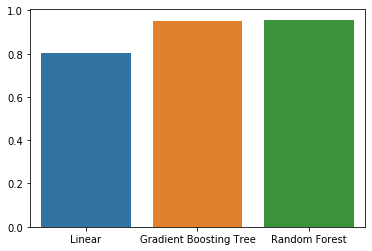

In [92]:
r2=[]
mse=[]
rmse = []
mape=[]
maxD=[]
for i in rg:
    r2.append(i["r2"])
    mse.append(i["mse"])
    rmse.append(i["rmse"])
    mape.append(i["mape"])
    maxD.append(i["maxDiff"])
#r2
sb.barplot(["Linear","Gradient Boosting Tree","Random Forest"],r2)


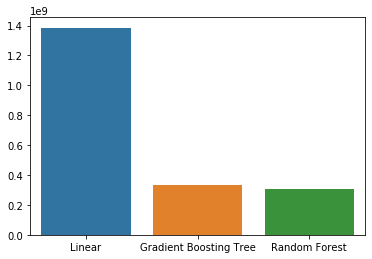

In [93]:
sb.barplot(["Linear","Gradient Boosting Tree","Random Forest"],mse)

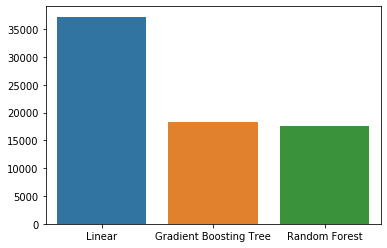

In [94]:
sb.barplot(["Linear","Gradient Boosting Tree","Random Forest"],rmse)

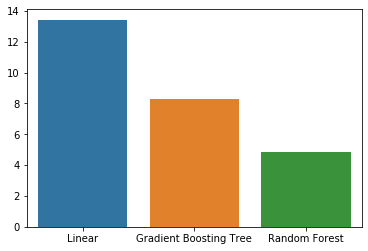

In [95]:
sb.barplot(["Linear","Gradient Boosting Tree","Random Forest"],mape)

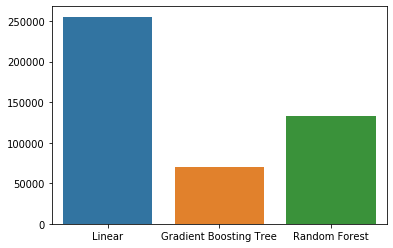

In [96]:
sb.barplot(["Linear","Gradient Boosting Tree","Random Forest"],maxD)

Wie erwartet ist der Lineare Regressor der mit Abstand schlechteste Regressor unserer Modelle, da es sich nur auf 3 Werte aus den gegebenen Werten bezieht und es vom Aufbau mit das leichteste ist.

Gradient Boosting Tree Regressor und Random Forest Regressor unterscheiden sich in den Messwerten R^2, MSE und RMSE relativ wenig.
Sie unterscheiden sich in der maximalen Differenz und dem MAPE Wert. Wir bevorzugen den MAPE Wert, weil die Maximale Differenz wenig aussagt, da sie durch einen Ausreißer stark verändert werden kann.
Da aber Random Forest einen besseren MAPE Wert besitzt werden wir dieses Modell weiter optimieren.

In [97]:
cl = []

In [98]:
#Decision Tree Classifier
cl.append(applyClassifier(dtC, testdata))


In [99]:
#Random Forest Classifier
cl.append(applyClassifier(rfC, testdata))

In [100]:
#Gradient Boosting Tree Classifier
cl.append(applyClassifier(gbC, testdata))

{'accuracy': 0.994413407821229, 'falsePositiveRate': 0.125, 'falseNegativeRate': 0.0}
{'accuracy': 0.9553072625698324, 'falsePositiveRate': 1.0, 'falseNegativeRate': 0.0}
{'accuracy': 0.9664804469273743, 'falsePositiveRate': 0.75, 'falseNegativeRate': 0.0}


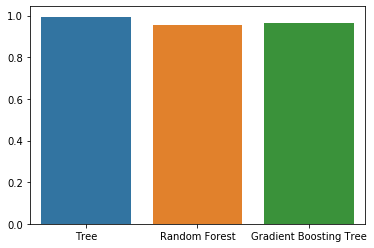

In [101]:
#{"accuracy": accuracy, "falsePositiveRate": falsePositiveRate, "falseNegativeRate": falseNegativeRate}
accuracy= []
falsePositiveRate =[]
falseNegativeRate = []

for i in cl:
    print(i)
    accuracy.append(i["accuracy"])
    falsePositiveRate.append(i["falsePositiveRate"])
    falseNegativeRate.append(i["falseNegativeRate"])
    
#r2
sb.barplot(["Tree","Random Forest","Gradient Boosting Tree"],accuracy)

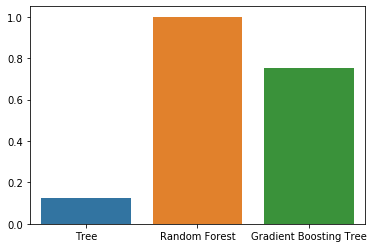

In [102]:
sb.barplot(["Tree","Random Forest","Gradient Boosting Tree"],falsePositiveRate)

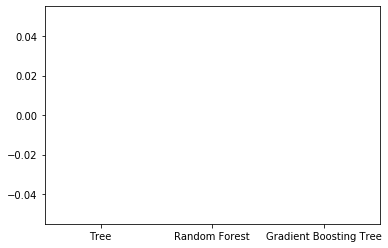

In [103]:
sb.barplot(["Tree","Random Forest","Gradient Boosting Tree"],falseNegativeRate)

Der Entscheidungsbaum hat wie man sieht die höchste Accuracy und eine gegenüber den anderen Modellen kleinere false Positive Rate.

Was auffällt: Bei allen Classifieren liegt die false Negative Rate bei 0.

Aufgrund der höheren Accuracy und den allgemein besseren Werten entscheiden wir uns dafür den Entscheidungsbaum zu optimieren und später einzusetzen.


# Optimierung der Modelle

In [104]:
#Optimierung Random Forest Regressor
#Alt:
applyRegressor(rfR,testdata)

{'r2': 0.9560993529271428,
 'mse': 307851582.9420675,
 'rmse': 17545.699841900507,
 'mape': 4.865994812443826,
 'maxDiff': 132639.17599999998}

In [105]:
rfR2 = RandomForestRegressor(n_estimators = 100000, random_state = 42, max_features = 3)
rfR2.fit(trainData, trainLabels)
applyRegressor(rfR2,testdata)

{'r2': 0.9596224600638193,
 'mse': 283145930.94790906,
 'rmse': 16826.94062947597,
 'mape': 4.842240202001849,
 'maxDiff': 124262.47597000003}

Eine höhere Anzahl an Estimators bringt eine höhere Performance in den Messwerten, doch das Berechnen wird immer langsamer sodass wir den Wert für die Tests nicht weiter erhöhen werden als 10000.
Die Performance der Messwerte scheint sich einem Grenzwert anzunähern.

In [106]:
rfR3 = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_features = 3)
rfR3.fit(trainData, trainLabels)
applyRegressor(rfR3,testdata)

{'r2': 0.9596921006232065,
 'mse': 282657579.22933996,
 'rmse': 16812.42335980569,
 'mape': 4.860086231216309,
 'maxDiff': 122596.54929999996}

In [107]:
rfR3 = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_features = 4)
rfR3.fit(trainData, trainLabels)
applyRegressor(rfR3,testdata)

{'r2': 0.9638271582018716,
 'mse': 253660648.5226929,
 'rmse': 15926.727489434008,
 'mape': 4.782334863470758,
 'maxDiff': 110640.13919999998}

In [108]:
rfR4 = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_features = 10)
rfR4.fit(trainData, trainLabels)
applyRegressor(rfR4,testdata)

{'r2': 0.9668657449184039,
 'mse': 232352677.1609313,
 'rmse': 15243.119010259392,
 'mape': 4.876909028725267,
 'maxDiff': 91858.71299999999}

In [109]:
rfR5 = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_features = 7)
rfR5.fit(trainData, trainLabels)
applyRegressor(rfR5,testdata)

{'r2': 0.9666794652310243,
 'mse': 233658956.23546538,
 'rmse': 15285.907111959872,
 'mape': 4.779284998759749,
 'maxDiff': 97630.89820000005}

In [110]:
rfR6 = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_features = 6)
rfR6.fit(trainData, trainLabels)
applyRegressor(rfR6,testdata)

{'r2': 0.9662487872371085,
 'mse': 236679068.94463012,
 'rmse': 15384.37743116796,
 'mape': 4.760277303939834,
 'maxDiff': 100803.7352}

In [111]:
rfR7 = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_features = 8)
rfR7.fit(trainData, trainLabels)
applyRegressor(rfR7,testdata)

{'r2': 0.9666710114435733,
 'mse': 233718238.0917064,
 'rmse': 15287.84609065994,
 'mape': 4.835020220092167,
 'maxDiff': 96630.35360000003}

Wir entscheiden uns für einen Baum mit 6 Features, da er einen niedrigen MAPE Wert aufweißt und die anderen Faktoren, dadurch nicht so viel in Mitleidenschaft gezoigen werden, wie bei anderen Random Forests.

In [112]:
rfRFinal = RandomForestRegressor(n_estimators = 100000, random_state = 42, max_features = 6)
rfRFinal.fit(trainData, trainLabels)
applyRegressor(rfRFinal,testdata)

{'r2': 0.9660694262155358,
 'mse': 237936831.1438435,
 'rmse': 15425.20117028765,
 'mape': 4.759337259092023,
 'maxDiff': 102369.84892000002}

In [113]:
#Optimieren des Decision Treee Classifiers

In [115]:
dtC = tree.DecisionTreeClassifier(criterion="gini", max_depth = None, min_samples_split = 2)
dtC = dtC.fit(trainCaData, trainCaLabels)
applyClassifier(dtC, testdata)

{'accuracy': 0.994413407821229,
 'falsePositiveRate': 0.125,
 'falseNegativeRate': 0.0}

In [116]:
dtC2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = None, min_samples_split = 2)
dtC2.fit(trainCaData, trainCaLabels)
applyClassifier(dtC2, testdata)

{'accuracy': 0.994413407821229,
 'falsePositiveRate': 0.125,
 'falseNegativeRate': 0.0}

In [135]:
dtC3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 11, min_samples_split = 2)
dtC3.fit(trainCaData, trainCaLabels)
applyClassifier(dtC3, testdata)

{'accuracy': 0.994413407821229,
 'falsePositiveRate': 0.125,
 'falseNegativeRate': 0.0}

In [ ]:
dtC4 = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4, min_samples_split = 2)
dtC4.fit(trainCaData, trainCaLabels)
applyClassifier(dtC4, testdata)

Sobald man das Kriterium ändert und ein bisschen mit der Max Tiefe rumspielt, erhält man das Ergebnis, dass das Kriterium Gini anscheinend besser ist als Entropy, da es mit einer geringeren Tiefe von 4 (bei Gini) zu 11 (bie Entropy) die gelcihe Accuracy und Rates bringt.

In [146]:
dtC5 = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4, min_samples_split = 26)
dtC5.fit(trainCaData, trainCaLabels)
applyClassifier(dtC5, testdata)

{'accuracy': 0.9664804469273743,
 'falsePositiveRate': 0.375,
 'falseNegativeRate': 0.01754386}

Die Variation von minimalen Samples bringt keine besseren Ergebnisse als wir nciht sowieso schon haben. Auch andere Variationen brachten keine weiteren Ergebnisse. Draraus folgend werden wir die Voreinstellungen mit Kriterium gleich Gini, einer unbegrenzten mmaximalen Tiefe und Splitten bei 2.